In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,PolynomialFeatures
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [5]:
black_friday_dataset=pd.read_csv(r'D:\Thimantha\Documents2\Data Science\BlackFriday.csv')

In [6]:
black_friday_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
black_friday_dataset['Product_Category_2']=black_friday_dataset['Product_Category_2'].fillna(0)

In [8]:
black_friday_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,NaN,7969


In [9]:
black_friday_dataset['Product_Category_3']=black_friday_dataset['Product_Category_3'].fillna(0)

In [10]:
black_friday_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [11]:
black_friday_dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [12]:
black_friday_dataset['Product_Category_2']=black_friday_dataset['Product_Category_2'].astype(int)

In [13]:
black_friday_dataset['Product_Category_3']=black_friday_dataset['Product_Category_3'].astype(int)

In [111]:
print(black_friday_dataset.Marital_Status)

0         0
1         0
2         0
3         0
4         0
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        0
15        0
16        0
17        0
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        0
26        0
27        0
28        0
29        1
         ..
537547    0
537548    1
537549    1
537550    0
537551    0
537552    0
537553    0
537554    0
537555    0
537556    1
537557    1
537558    1
537559    1
537560    1
537561    1
537562    1
537563    1
537564    1
537565    1
537566    1
537567    1
537568    1
537569    1
537570    1
537571    0
537572    0
537573    0
537574    0
537575    0
537576    0
Name: Marital_Status, Length: 537577, dtype: int64


In [14]:
black_friday_dataset=black_friday_dataset.loc[:,['Gender','Age','Occupation','City_Category','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]

In [15]:
black_friday_dataset.head(100)

,Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,3,0,0,8370
1,F,0-17,10,A,1,6,14,15200
2,F,0-17,10,A,12,0,0,1422
3,F,0-17,10,A,12,14,0,1057
4,M,55+,16,C,8,0,0,7969
5,M,26-35,15,A,1,2,0,15227
6,M,46-50,7,B,1,8,17,19215
7,M,46-50,7,B,1,15,0,15854
8,M,46-50,7,B,1,16,0,15686
9,M,26-35,20,A,8,0,0,7871


In [124]:
x=black_friday_dataset.loc[:,['Gender','Age','Occupation','City_Category','Product_Category_1','Product_Category_2','Product_Category_3']]

In [125]:
y=black_friday_dataset.loc[:,['Purchase']]

In [126]:
labelencoder_x=LabelEncoder()

In [130]:
x.iloc[:,0]=labelencoder_x.fit_transform(x.iloc[:,0])

In [131]:
x.iloc[:,1]=labelencoder_x.fit_transform(x.iloc[:,1])

In [132]:
x.iloc[:,3]=labelencoder_x.fit_transform(x.iloc[:,3])

In [133]:
print(x)

        Gender  Age  Occupation  City_Category  Product_Category_1  \
0            0    0          10              0                   3   
1            0    0          10              0                   1   
2            0    0          10              0                  12   
3            0    0          10              0                  12   
4            1    6          16              2                   8   
5            1    2          15              0                   1   
6            1    4           7              1                   1   
7            1    4           7              1                   1   
8            1    4           7              1                   1   
9            1    2          20              0                   8   
10           1    2          20              0                   5   
11           1    2          20              0                   8   
12           1    2          20              0                   8   
13           1    2 

In [135]:
onehotencoder=OneHotEncoder(categorical_features=[0,1,3])

In [136]:
x=onehotencoder.fit_transform(x).toarray()

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [137]:
print(x)

[[ 1.  0.  1. ...  3.  0.  0.]
 [ 1.  0.  1. ...  1.  6. 14.]
 [ 1.  0.  1. ... 12.  0.  0.]
 ...
 [ 0.  1.  0. ...  8. 15.  0.]
 [ 0.  1.  0. ...  5.  0.  0.]
 [ 0.  1.  0. ...  5.  8.  0.]]


In [138]:
x.shape

(537577, 16)

In [157]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=1/4,random_state=0)

In [151]:
print(x_train)

[[ 0.  1.  0. ...  3.  5.  0.]
 [ 1.  0.  1. ...  1.  2.  5.]
 [ 0.  1.  0. ... 11.  0.  0.]
 ...
 [ 1.  0.  0. ...  5.  0.  0.]
 [ 1.  0.  0. ...  8. 14.  0.]
 [ 1.  0.  0. ...  5. 14.  0.]]


In [152]:
print(y_train)

        Purchase
178056     11019
281344     19291
85963       2987
245211      6091
466793      4033
318264      6040
411655      8677
55699       6018
514290     19362
282009      5846
295302      5852
444721      8789
38384      11979
182261      7763
27352       8592
374523      5335
409101     11930
365682     15776
14510       6883
188160     16341
109304     11771
309674      6993
428016      6447
509692       212
106856     12407
121515      6871
326379     15160
54640      23300
136853     15218
113654      3879
...          ...
149503     12775
384681      1740
156730     20243
500186     11341
486232     15491
258795      6873
421909      2129
347449      5206
184779      7949
214176      3969
235796     11459
103355      7111
199041      3813
327069     16094
321879      6873
64820      15373
329365     19895
41090       7935
278167      1714
191335      7138
175203      8058
87498       8704
521430       758
137337      6886
54886      15301
110268      1862
259178      86

In [153]:
lm=sklm.LinearRegression()

In [154]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
prediction=lm.predict(x_test)

In [156]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))


print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 21525483.80
Variance score: 0.13


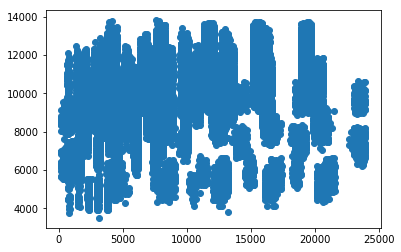

In [149]:
plt.scatter(y_test,prediction)
plt.show()

In [160]:
dtr=DecisionTreeRegressor()

In [161]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [162]:
prediction=dtr.predict(x_test)

In [163]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))


print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 9747265.20
Variance score: 0.61


In [165]:
rfr=RandomForestRegressor()

In [166]:
rfr.fit(x_train,y_train)

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [167]:
prediction=rfr.predict(x_test)

In [168]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))


print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 9219545.44
Variance score: 0.63


In [170]:
poly_features = PolynomialFeatures(degree=2)
x_train_polynomial = poly_features.fit_transform(x_train)

In [171]:
pm=sklm.LinearRegression()

In [172]:
pm.fit(x_train_polynomial,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
prediction=pm.predict(poly_features.fit_transform(x_test))

In [175]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 18288890.77
Variance score: 0.26


In [176]:
x=black_friday_dataset.loc[:,['Gender','Age','Occupation','City_Category']]
y=black_friday_dataset.loc[:,['Purchase']]

In [177]:
print(x)

       Gender    Age  Occupation City_Category
0           F   0-17          10             A
1           F   0-17          10             A
2           F   0-17          10             A
3           F   0-17          10             A
4           M    55+          16             C
5           M  26-35          15             A
6           M  46-50           7             B
7           M  46-50           7             B
8           M  46-50           7             B
9           M  26-35          20             A
10          M  26-35          20             A
11          M  26-35          20             A
12          M  26-35          20             A
13          M  26-35          20             A
14          F  51-55           9             A
15          F  51-55           9             A
16          F  51-55           9             A
17          F  51-55           9             A
18          M  36-45           1             B
19          M  26-35          12             C
20          M

In [178]:
labelencoder_x=LabelEncoder()
x.iloc[:,0]=labelencoder_x.fit_transform(x.iloc[:,0])
x.iloc[:,1]=labelencoder_x.fit_transform(x.iloc[:,1])
x.iloc[:,3]=labelencoder_x.fit_transform(x.iloc[:,3])

In [179]:
onehotencoder=OneHotEncoder(categorical_features=[0,1,3])

In [180]:
x=onehotencoder.fit_transform(x).toarray()

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [181]:
print(x)

[[ 1.  0.  1. ...  0.  0. 10.]
 [ 1.  0.  1. ...  0.  0. 10.]
 [ 1.  0.  1. ...  0.  0. 10.]
 ...
 [ 0.  1.  0. ...  0.  1. 16.]
 [ 0.  1.  0. ...  0.  1. 16.]
 [ 0.  1.  0. ...  0.  1. 16.]]


In [182]:
lm=sklm.LinearRegression()

In [183]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
prediction=lm.predict(x_test)

In [188]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 21487908.83
Variance score: 0.13


In [191]:
rfr=RandomForestRegressor()

In [192]:
rfr.fit(x_train,y_train)

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [193]:
prediction=rfr.predict(x_test)

In [194]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 9195839.21
Variance score: 0.63


In [195]:
x=black_friday_dataset.loc[:,['Gender','City_Category']]
y=black_friday_dataset.loc[:,['Purchase']]

In [196]:
labelencoder_x=LabelEncoder()
x.iloc[:,0]=labelencoder_x.fit_transform(x.iloc[:,0])
x.iloc[:,1]=labelencoder_x.fit_transform(x.iloc[:,1])


In [197]:
onehotencoder=OneHotEncoder(categorical_features=[0,1])

In [198]:
x=onehotencoder.fit_transform(x).toarray()

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [199]:
print(x)

[[1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]]


In [200]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=1/4,random_state=0)

In [211]:
lm=sklm.LinearRegression()

In [212]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
prediction=lm.predict(x_test)

In [214]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 24552404.34
Variance score: 0.01


In [16]:
x=black_friday_dataset.loc[:,['Gender','Age']]
y=black_friday_dataset.loc[:,['Purchase']]

In [20]:
labelencoder_x=LabelEncoder()
x.iloc[:,0]=labelencoder_x.fit_transform(x.iloc[:,0])
x.iloc[:,1]=labelencoder_x.fit_transform(x.iloc[:,1])

In [21]:
onehotencoder=OneHotEncoder(categorical_features=[0,1])

In [22]:
x=onehotencoder.fit_transform(x).toarray()

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [24]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=1/4,random_state=0)

In [26]:
lm=sklm.LinearRegression()

In [27]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
prediction=lm.predict(x_test)

In [29]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 24666652.58
Variance score: 0.00


In [31]:
rfr=RandomForestRegressor()

In [32]:
rfr.fit(x_train,y_train)

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
prediction=rfr.predict(x_test)

In [34]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 24660323.91
Variance score: 0.00


In [35]:
x=black_friday_dataset.loc[:,['Gender']]
y=black_friday_dataset.loc[:,['Purchase']]

In [36]:
labelencoder_x=LabelEncoder()
x.iloc[:,0]=labelencoder_x.fit_transform(x.iloc[:,0])

In [37]:
onehotencoder=OneHotEncoder(categorical_features=[0])

In [39]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=1/4,random_state=0)

In [40]:
lm=sklm.LinearRegression()

In [44]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
prediction=lm.predict(x_test)

In [47]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 24678164.91
Variance score: 0.00


In [48]:
x=black_friday_dataset.loc[:,['Gender','Age','Occupation','City_Category']]
y=black_friday_dataset.loc[:,['Purchase']]

In [49]:
labelencoder_x=LabelEncoder()
x.iloc[:,0]=labelencoder_x.fit_transform(x.iloc[:,0])
x.iloc[:,1]=labelencoder_x.fit_transform(x.iloc[:,1])
x.iloc[:,3]=labelencoder_x.fit_transform(x.iloc[:,3])

In [50]:
onehotencoder=OneHotEncoder(categorical_features=[0,1,3])

In [51]:
x=onehotencoder.fit_transform(x).toarray()

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [52]:
x_train,x_test,y_train,y_test=skms.train_test_split(x,y,test_size=1/4,random_state=0)

In [53]:
rfr=RandomForestRegressor()

In [54]:
rfr.fit(x_train,y_train)

C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thimanthav.BRANDIXLK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
prediction=rfr.predict(x_test)

In [56]:
print("Mean squared error : %.2f"
      % mean_squared_error(y_test,prediction))

print('Variance score: %.2f' % r2_score(y_test,prediction))

Mean squared error : 24249905.80
Variance score: 0.02
